<h1 style="color:blue;">Outline of Scenario 11 notebook:</h1> 

- C1.S11.Py01 – One-hot encoding Loan Purpose and its properties
- C1.S11.Py02 – Fill in Null values with median in length of employment
- C1.S11.Py03 – Creating and applying a function to code delinquencies
- C1.S11.Py04 – Run regression with newest features
- C1.S11.Py05 – Calculating VIF and correlation



In [153]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [155]:
#Code Block 2
df = pd.read_csv('data/Scenario11.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

In [156]:
#Code Block 3
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  int64  
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Accounts             29930 non-null  int64  
 8   Total Revolving Credit Line    29930 non-null  int64  
 9   Term                           29930 non-null  int64  
 10  Grade                          29930 non-null  object 
 11  Employee Title                 28266 non-null  object 
 12  Length of Employment           28853 non-null  floa

In [159]:
#Code Block 4
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Loan Purpose,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,149512,848058,8/18/19,19.05,7200,154930,58000,3874,4300,36,D,Arkwright,9.0,RENT,debt_consolidation,028xx,RI,NaN,0,6,36 months,6,8,2019,0.124138,2.671207,0.900930,0.066793,1,58000
1,407046,659709,5/21/18,10.16,16000,29116,55000,6840,24800,36,B,School,4.0,RENT,debt_consolidation,926xx,CA,NaN,1,12,36 months,0,5,2018,0.290909,0.529382,0.275806,0.124364,1,55000
2,507531,601368,1/1/18,10.16,35000,60019,130000,23025,55800,36,B,gSEMI,8.0,RENT,credit_card,940xx,CA,NaN,1,11,36 months,0,1,2018,0.269231,0.461685,0.412634,0.177115,1,130000
3,513904,761341,1/3/19,6.03,21000,37603,120000,18641,85031,36,A,Fidelity Investments,10.0,RENT,debt_consolidation,021xx,MA,NaN,0,16,36 months,3,1,2019,0.175000,0.313358,0.219226,0.155342,0,0
4,603349,885844,11/17/19,16.29,15000,227890,72000,11702,26300,36,C,NaN,NaN,MORTGAGE,house,341xx,FL,NaN,1,18,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000


<h2 style="color:blue;">One-hot encoding Loan Purpose and its properties</h2> 

In [162]:
#Code Block 5
df['Loan Purpose'].value_counts()

Loan Purpose
debt_consolidation    18067
credit_card            6737
home_improvement       1419
other                  1256
major_purchase          617
small_business          429
car                     349
medical                 295
wedding                 268
moving                  159
house                   158
vacation                144
renewable_energy         32
Name: count, dtype: int64

### If you like seeing results in a DataFrame format, it is easy to do with pd.DataFrame( )

In [165]:
#Code Block 6
pd.DataFrame(df['Loan Purpose'].value_counts())

,count
Loan Purpose,
debt_consolidation,18067
credit_card,6737
home_improvement,1419
other,1256
major_purchase,617
small_business,429
car,349
medical,295
wedding,268


In [167]:
#Code Block 7
df_reg = df.copy()

<h3 style="color:blue;">Create dummy variables for Loan Purpose </h3>

- Create the dummy variables *(ex. car, creditcard, debt_consolidation, etc)*
- Concatenate with the original DataFrame *(ex. dummies_LoanPurpose with df_reg)*
- Drop the original variable that was used to create the dummy variables *(ex. Loan Purpose)*

In [170]:
#Code Block 8

#Create Dummy Variables for Loan Purpose
dummies_LoanPurpose = pd.get_dummies(df_reg['Loan Purpose'], drop_first = False)
#df_reg = pd.concat([df_reg, dummies_LoanPurpose], axis = 1)

dummies_LoanPurpose.head()

,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
No,,,,,,,,,,,,,
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False


### Add a prefix for each category

In [173]:
#Code Block 9
dummies_LoanPurpose1 = pd.get_dummies(df_reg['Loan Purpose'],dtype=int, prefix='lp', drop_first = False)
dummies_LoanPurpose1.head()

,lp_car,lp_credit_card,lp_debt_consolidation,lp_home_improvement,lp_house,lp_major_purchase,lp_medical,lp_moving,lp_other,lp_renewable_energy,lp_small_business,lp_vacation,lp_wedding
No,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0


### Drop the first category based on alphabetical order

In [176]:
#Code Block 10
dummies_LoanPurpose2 = pd.get_dummies(df_reg['Loan Purpose'],dtype=int, prefix='lp', drop_first = True)
dummies_LoanPurpose2.head()

,lp_credit_card,lp_debt_consolidation,lp_home_improvement,lp_house,lp_major_purchase,lp_medical,lp_moving,lp_other,lp_renewable_energy,lp_small_business,lp_vacation,lp_wedding
No,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


### Change the dtype from uint8 to int64

In [179]:
#Code Block 11
dummies_LoanPurpose3 = pd.get_dummies(df_reg['Loan Purpose'], prefix='lp', drop_first = True, dtype='int')
dummies_LoanPurpose3.head()

,lp_credit_card,lp_debt_consolidation,lp_home_improvement,lp_house,lp_major_purchase,lp_medical,lp_moving,lp_other,lp_renewable_energy,lp_small_business,lp_vacation,lp_wedding
No,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [181]:
#Code Block 12
dummies_LoanPurpose.info()
dummies_LoanPurpose3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   car                 29930 non-null  bool 
 1   credit_card         29930 non-null  bool 
 2   debt_consolidation  29930 non-null  bool 
 3   home_improvement    29930 non-null  bool 
 4   house               29930 non-null  bool 
 5   major_purchase      29930 non-null  bool 
 6   medical             29930 non-null  bool 
 7   moving              29930 non-null  bool 
 8   other               29930 non-null  bool 
 9   renewable_energy    29930 non-null  bool 
 10  small_business      29930 non-null  bool 
 11  vacation            29930 non-null  bool 
 12  wedding             29930 non-null  bool 
dtypes: bool(13)
memory usage: 613.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dty

#### Cannot drop first or last if you wish to drop the baseline or category with the most values.

In [184]:
#Code Block 13
print('---------------------------------------------------')
print("car")
print(dummies_LoanPurpose['car'].value_counts())
print('---------------------------------------------------')
print("credit_card")
print(dummies_LoanPurpose['credit_card'].value_counts())
print('---------------------------------------------------')
print("debt_consolidation")
print(dummies_LoanPurpose['debt_consolidation'].value_counts())
print('---------------------------------------------------')
print("home_improvement")
print(dummies_LoanPurpose['home_improvement'].value_counts())
print('---------------------------------------------------')

---------------------------------------------------
car
car
False    29581
True       349
Name: count, dtype: int64
---------------------------------------------------
credit_card
credit_card
False    23193
True      6737
Name: count, dtype: int64
---------------------------------------------------
debt_consolidation
debt_consolidation
True     18067
False    11863
Name: count, dtype: int64
---------------------------------------------------
home_improvement
home_improvement
False    28511
True      1419
Name: count, dtype: int64
---------------------------------------------------


In [186]:
#Code Block 14
dummies_LoanPurpose.head()

,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
No,,,,,,,,,,,,,
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False


In [188]:
#Code Block 15
#dummies_LoanPurpose = dummies_LoanPurpose.drop(['debt_consolidation'], axis = 1)
df_reg = pd.concat([df_reg, dummies_LoanPurpose], axis = 1)

#Drop Loan Purpose
df_reg = df_reg.drop(['Loan Purpose'], axis = 1)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  int64  
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Accounts             29930 non-null  int64  
 8   Total Revolving Credit Line    29930 non-null  int64  
 9   Term                           29930 non-null  int64  
 10  Grade                          29930 non-null  object 
 11  Employee Title                 28266 non-null  object 
 12  Length of Employment           28853 non-null  floa

<h2 style="color:blue;">Fill in Null values with median in length of employment</h2> 

### What can you do with missing data?  (NaN)
- **Leave as-is**
    - cannot leave it as is if you plan on using it for a predictive model (cannot have NaNs)
- **5.1 Drop them**
    - df_dropped = df_nan.dropna() 
- **5.2 Fill missing value**
    - Fill with a value 
        - df_nan['gender'] = df_nan['gender'].fillna('missing')
        - df_nan[['total_bill', 'size']] = tips_nan[['total_bill','size']].fillna(0)
    - Fill with a summary statistic
        - df_nan['tip'] = df_nan['tip'].fillna(df_nan['tip'].mean())
    - Fill in with Forward or backward
        - df.fillna(method='ffill')
        - df.fillna(method='bfill')
        


http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html

In [191]:
#Code Block 16
df_reg.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Accounts,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Home Ownership,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,149512,848058,8/18/19,19.05,7200,154930,58000,3874,4300,36,D,Arkwright,9.0,RENT,028xx,RI,NaN,0,6,36 months,6,8,2019,0.124138,2.671207,0.900930,0.066793,1,58000,False,False,True,False,False,False,False,False,False,False,False,False,False
1,407046,659709,5/21/18,10.16,16000,29116,55000,6840,24800,36,B,School,4.0,RENT,926xx,CA,NaN,1,12,36 months,0,5,2018,0.290909,0.529382,0.275806,0.124364,1,55000,False,False,True,False,False,False,False,False,False,False,False,False,False
2,507531,601368,1/1/18,10.16,35000,60019,130000,23025,55800,36,B,gSEMI,8.0,RENT,940xx,CA,NaN,1,11,36 months,0,1,2018,0.269231,0.461685,0.412634,0.177115,1,130000,False,True,False,False,False,False,False,False,False,False,False,False,False
3,513904,761341,1/3/19,6.03,21000,37603,120000,18641,85031,36,A,Fidelity Investments,10.0,RENT,021xx,MA,NaN,0,16,36 months,3,1,2019,0.175000,0.313358,0.219226,0.155342,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False
4,603349,885844,11/17/19,16.29,15000,227890,72000,11702,26300,36,C,NaN,NaN,MORTGAGE,341xx,FL,NaN,1,18,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000,False,False,False,False,True,False,False,False,False,False,False,False,False


In [193]:
#Code Block 17
pd.DataFrame(df_reg['Length of Employment'].value_counts(dropna=False))

,count
Length of Employment,
10.0,9485
1.0,4053
2.0,2630
5.0,2431
3.0,2120
6.0,2016
4.0,1971
7.0,1748
8.0,1338


In [195]:
#Code Block 18
pd.DataFrame(round(df_reg['Length of Employment'].describe(), 2))

,Length of Employment
count,28853.00
mean,6.07
std,3.44
min,1.00
25%,3.00
50%,6.00
75%,10.00
max,10.00


#### NOTE: 50th percentile is also the median

In [198]:
#Code Block 19
df_reg['Length of Employment'].median()

6.0

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_10644/2257020152.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reg['Length of Employment'], color="m")


<Axes: xlabel='Length of Employment', ylabel='Density'>

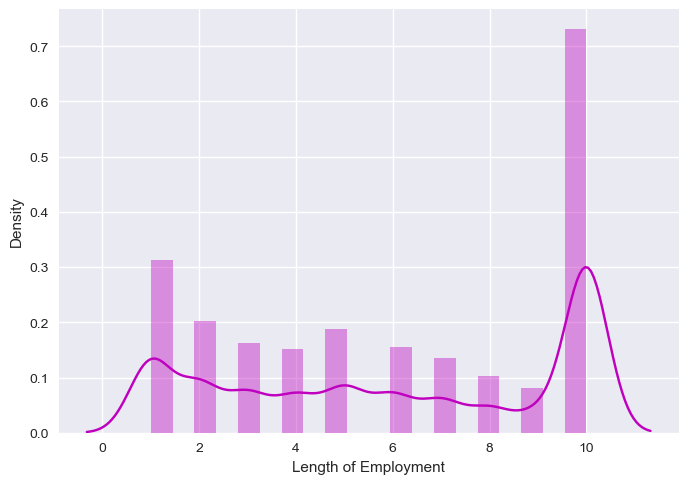

In [200]:
#Code Block 20
# Plot a histogram and color magenta
sns.distplot(df_reg['Length of Employment'], color="m")

In [201]:
#Code Block 21
df_reg['Length of Employment'] = df_reg['Length of Employment'].fillna(df_reg['Length of Employment'].median())
pd.DataFrame(df_reg['Length of Employment'].value_counts(dropna=False))

,count
Length of Employment,
10.0,9485
1.0,4053
6.0,3093
2.0,2630
5.0,2431
3.0,2120
4.0,1971
7.0,1748
8.0,1338


In [202]:
#Code Block 22
pd.DataFrame(round(df_reg['Length of Employment'].describe(), 2))

,Length of Employment
count,29930.00
mean,6.07
std,3.38
min,1.00
25%,3.00
50%,6.00
75%,10.00
max,10.00


/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_10644/2494112763.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reg['Length of Employment'], color="b")


<Axes: xlabel='Length of Employment', ylabel='Density'>

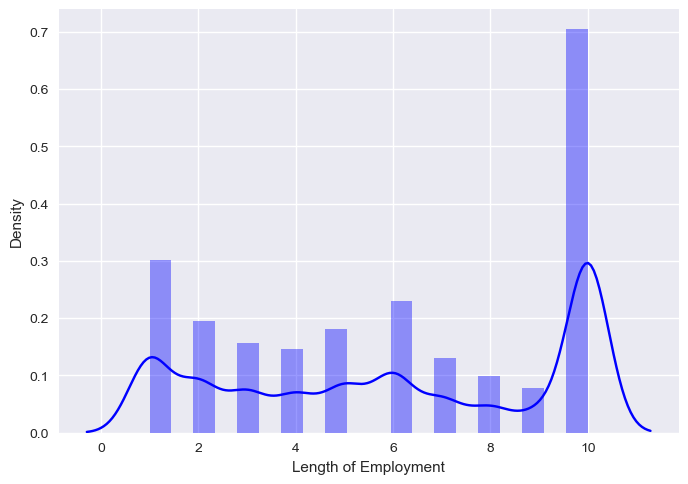

In [206]:
#Code Block 23
# Plot a histogram and color blue
sns.distplot(df_reg['Length of Employment'], color="b")

<h2 style="color:blue;">Creating and applying a function to code delinquencies</h2> 


In [208]:
#Code Block 24
pd.DataFrame(df_reg['Delinquencies Past 24 Months'].value_counts(dropna=False))

,count
Delinquencies Past 24 Months,
NaN,25081
1.0,3446
2.0,936
3.0,264
4.0,101
5.0,47
6.0,24
7.0,15
9.0,5


### Instead of filling in the NaNs with a number or calculation, we will turn this quantitative variable into a binary decision:
- If **delinquencies within the past 24 Months** > 0 then code it as a 1.
- Otherwise code it as a 0, which will be all of the NaN values.

### Change Delinquencies Past 24 Months to a binary feature

In [213]:
#Code Block 25
def delinq(c):
  if c['Delinquencies Past 24 Months'] >= 0:
    return 1
  else:
    return 0

df_reg['Delinquencies Past 24 Months'] = df_reg.apply(delinq, axis=1)
display(df_reg['Delinquencies Past 24 Months'].value_counts())

Delinquencies Past 24 Months
0    25081
1     4849
Name: count, dtype: int64

In [215]:
#Code Block 26
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  int64  
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Accounts             29930 non-null  int64  
 8   Total Revolving Credit Line    29930 non-null  int64  
 9   Term                           29930 non-null  int64  
 10  Grade                          29930 non-null  object 
 11  Employee Title                 28266 non-null  object 
 12  Length of Employment           29930 non-null  floa

<h2 style="color:blue;">Run regression with newest features</h2>

<h3 style="color:blue;">Features to include:</h3>

- All previous features
- Term
- Length of employment
- Open accounts 
- Credit inquiries
- Loan purpose categories (not including debt consolidation)
- Delinquencies Past 24 Months


In [218]:
#Code Block 27
df_reg.columns

Index(['Member ID', 'Loan ID', 'Origination Date', 'Interest Rate',
       'Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Accounts',
       'Total Revolving Credit Line', 'Term', 'Grade', 'Employee Title',
       'Length of Employment', 'Home Ownership', 'Zip Code of Residence',
       'State of Residence', 'Delinquencies Past 24 Months',
       'Credit Inquires Last 6 Months', 'Open Accounts', 'TermString', 'Day',
       'Month', 'Year', 'Loan_Income', 'Debt_Income', 'RevBal_Line',
       'RevBal_Income', 'Income Verification', 'IncVer_Income_act', 'car',
       'credit_card', 'debt_consolidation', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

#### Do not include the following vairables:
- 'Member ID' 
- 'Loan ID'
- 'Origination Date'
- 'Interest Rate' (y or target variable) 
- 'Grade'
- 'Employee Title'
- 'Zip Code of Residence'
- 'State of Residence'
- 'TermString'
- 'Day'
- 'Month' 
- 'Year'
- 'MORTGAGE' (baseline for Home Ownership)
- 'debt_consolidation' (baseline for Loan Purpose) 

In [260]:
#Code Block 28

#X includes all expected features including Home Ownership, Length of employmnet, and Loan Purpose
#No MORTGAGE or debt_consolidation

X = df_reg[['Amount Funded', 'Total Debt', 'Annual Income', 'Revolving Balance',
            'Total Revolving Credit Line', 'Term','Length of Employment', 'Delinquencies Past 24 Months', 
            'Credit Inquires Last 6 Months','Open Accounts', 'Loan_Income', 'Debt_Income', 
            'RevBal_Line', 'RevBal_Income', 'Income Verification', 'IncVer_Income_act', 'OTHER', 
            'OWN', 'RENT', 'Own_RevLine_act', 'car', 'credit_card', 'home_improvement', 'house', 'major_purchase', 
            'medical', 'moving', 'other', 'renewable_energy','small_business', 'vacation', 'wedding']]
y = df_reg[['Interest Rate']]

KeyError: "['Revolving Balance', 'OTHER', 'OWN', 'RENT', 'Own_RevLine_act'] not in index"

In [262]:
#Code Block 29
import statsmodels
import statsmodels.api as sm

In [264]:
#Code Block 30
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

NameError: name 'X' is not defined

In [266]:
#Code Block 31

#Create Predictions dataframe
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred1'})

#Create Residuals dataframe
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid1'})


#Concat results into one dataframe
df_reg_results = pd.concat([df_reg, df_predictions1, df_resid1], axis=1)

df_reg_results[['Amount Funded', 'Total Debt', 'Annual Income','Interest Rate', 'Int_Pred1', 'Resid1']].head()

NameError: name 'predictions1' is not defined

<h2 style="color:blue;">Calculating VIF on feature variables and correlation</h2>



In [269]:
#Code Block 32
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [271]:
#Code Block 33
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

NameError: name 'X' is not defined

In [273]:
#Code Block 34

corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

ValueError: could not convert string to float: '8/18/19'

NameError: name 'df_corrMatrix' is not defined

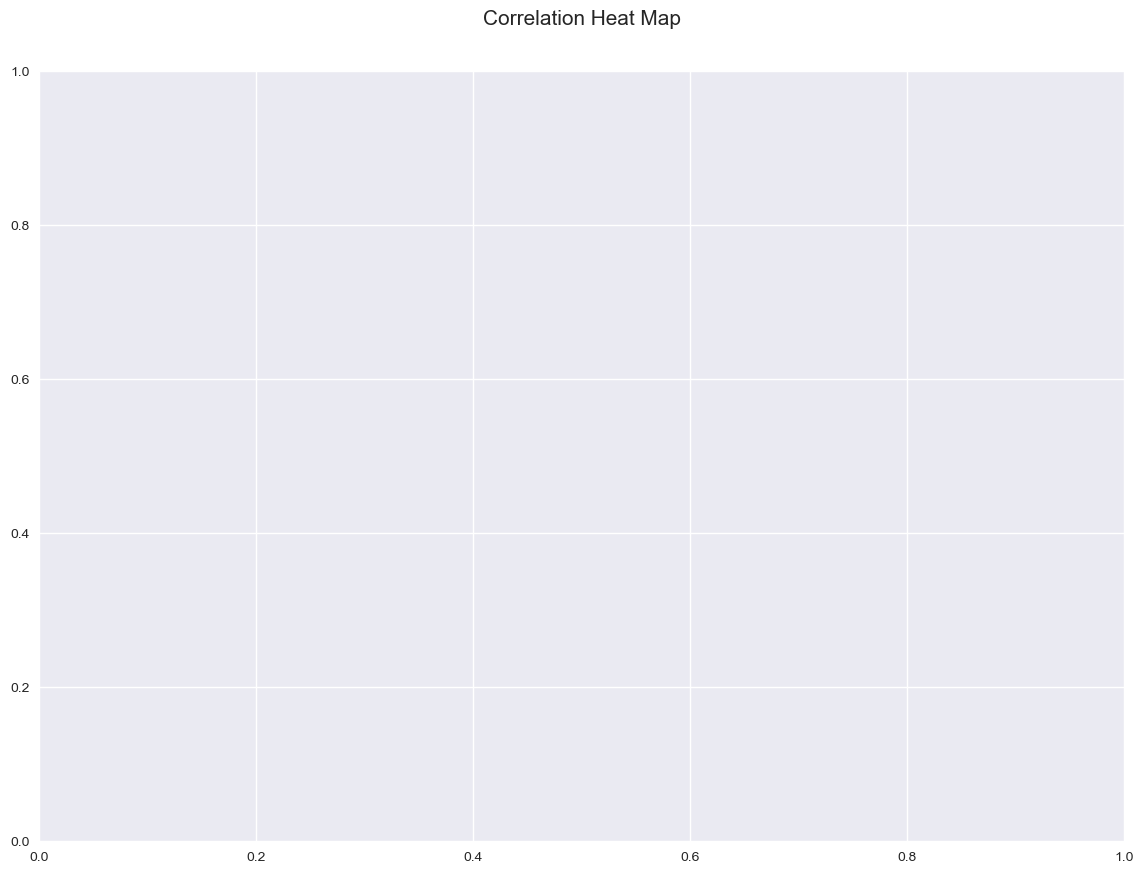

In [275]:
#Code Block 35
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Take off annotation and change colormap
- Link to the different styles of colormaps
    - https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

NameError: name 'df_corrMatrix' is not defined

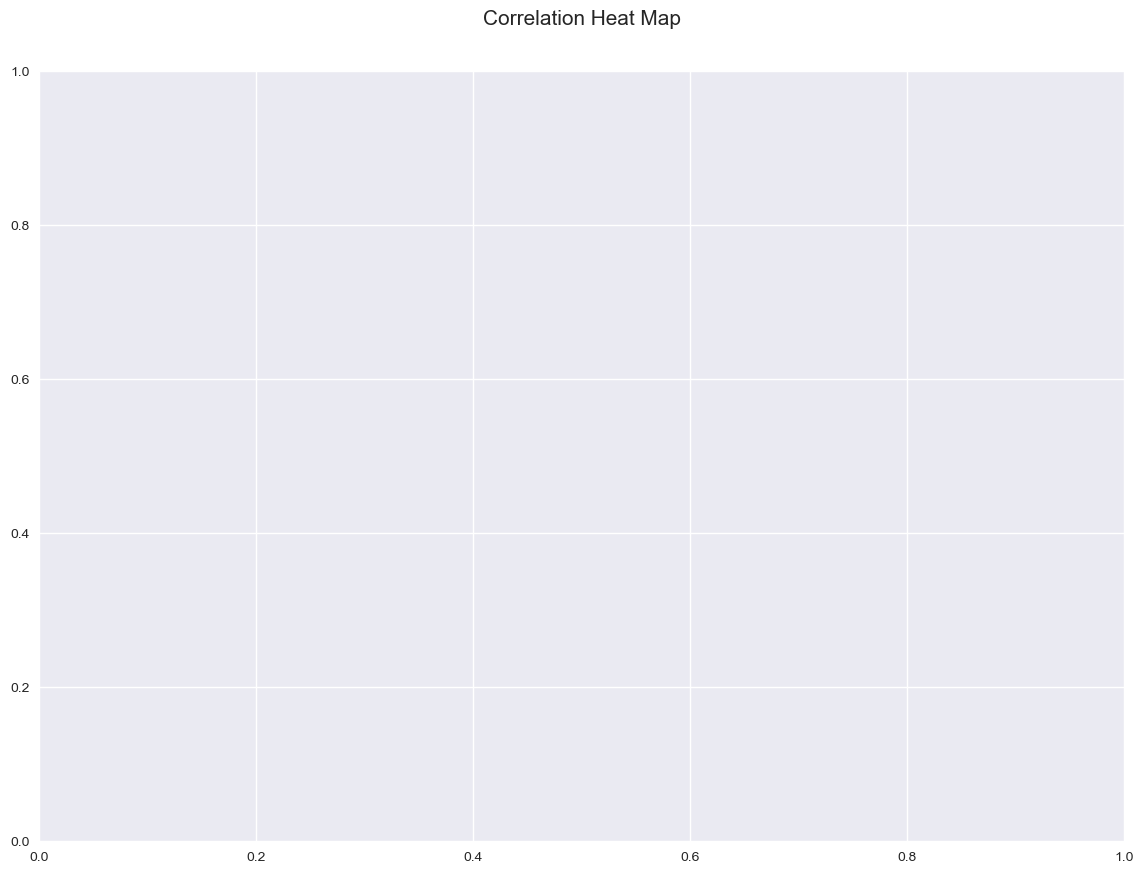

In [278]:
#Code Block 36
colormap = plt.cm.coolwarm
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

### Graphically looking at residuals using lowess

- LOWESS (Locally Weighted Scatterplot Smoothing), is a tool used in regression analysis that creates a smooth line through a scatter plot to help you to see relationship between variables and foresee trends.
- https://www.statisticshowto.com/lowess-smoothing/

In [281]:
#Code Block 37
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred1', y='Resid1', 
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

NameError: name 'df_reg_results' is not defined

<Figure size 2000x1000 with 0 Axes>

### Look at the highest deviations from actuals (highest residual and lowest residual)

In [284]:
#Code Block 38
df_reg_results.sort_values(by='Resid1').head(10)

NameError: name 'df_reg_results' is not defined

In [286]:
#Code Block 39
df_reg_results.sort_values(by='Resid1', ascending=False).head(10)

NameError: name 'df_reg_results' is not defined